**Name**: Sujan Dumaru  
**Course**: MSCS 634-B01: Advanced Big Data and Data Mining  
**Lab 3 Assignment**: Clustering Analysis Using K-Means and K-Medoids Algorithms

# Step 1: Load and Prepare the Dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the dataset
wine_dataset = load_wine()
x = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
y = pd.Series(wine_dataset.target, name='true_label')

# Print dataset description and feature names
print(wine_dataset.DESCR)
print('Features:', wine_dataset.feature_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [2]:
from sklearn.preprocessing import StandardScaler

# Exploration
print(x.head())
print(y.value_counts())

# Check for missing values
print("\nMissing values per feature:\n", x.isna().sum())

# Standardization using z-score normalization
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Confirm scaling: each column now has mean ≈ 0 and std ≈ 1
x_scaled.describe().loc[['mean','std']]

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


# Step 2: Implement K-Means Clustering
In this section, I apply K-Means with \(k=3\) to the standardized wine data, then compute the Silhouette Score and Adjusted Rand Index to evaluate how well the clusters align internally and with the true labels.

Silhouette Score (K-Means): 0.285
Adjusted Rand Index (K-Means): 0.897


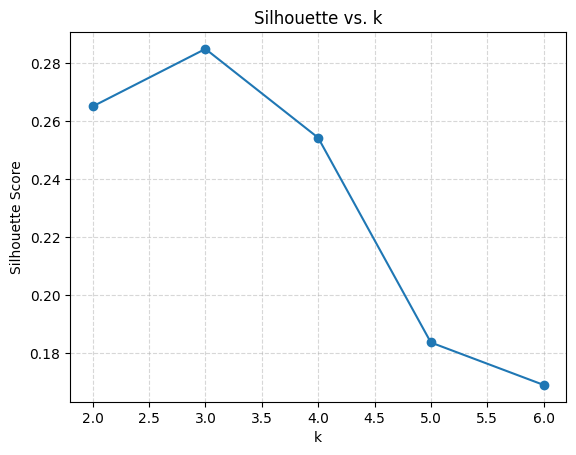

In [3]:
# Import required classes and metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Initialize and fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)            # fixed seed for reproducibility
labels_km = kmeans.fit_predict(x_scaled)                  # cluster assignment for each sample

# Compute evaluation metrics
sil_km = silhouette_score(x_scaled, labels_km)            # how well-separated clusters are
ari_km = adjusted_rand_score(y, labels_km)                # agreement with true labels

# Display the results
print(f"Silhouette Score (K-Means): {sil_km:.3f}")        
print(f"Adjusted Rand Index (K-Means): {ari_km:.3f}")

# silhouette vs. k
scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42).fit(x_scaled)
    scores.append(silhouette_score(x_scaled, km.labels_))
plt.plot(range(2, 7), scores, marker='o')
plt.title("Silhouette vs. k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Insights:**  
- The Silhouette Score of 0.285 suggests that clusters overlap significantly in feature space, indicating that some samples lie near the boundary between clusters.  
- The high ARI of 0.897 shows that despite this overlap, K-Means correctly groups most samples according to their true cultivar labels.  
- Together, these results imply that while the overall cluster shapes may not be perfectly compact or well separated (hence the low silhouette), the algorithm still captures the main class distinctions present in the Wine dataset.

# Step 3: Implement K-Medoids Clustering
In this step, I apply the K-Medoids algorithm (PAM) with \(k=3\) to the same standardized data. I then compute the Silhouette Score and Adjusted Rand Index to compare performance against K-Means.

In [4]:
# Import the built-in KMedoids (need to have scikit-learn-extra)
from sklearn_extra.cluster import KMedoids

# Initialize and fit K-Medoids
kmedoids = KMedoids(n_clusters=3, method='pam', random_state=42)
labels_kmed = kmedoids.fit_predict(x_scaled)

# Compute metrics
sil_kmed = silhouette_score(x_scaled, labels_kmed)
ari_kmed = adjusted_rand_score(y, labels_kmed)

print(f"Silhouette Score (K-Medoids): {sil_kmed:.3f}")
print(f"Adjusted Rand Index (K-Medoids): {ari_kmed:.3f}")

Silhouette Score (K-Medoids): 0.268
Adjusted Rand Index (K-Medoids): 0.741


**Insights:**

- The Silhouette Score of 0.268 indicates that clusters overlap notably in feature space, with several samples near cluster boundaries.
- The ARI of 0.741 shows that K-Medoids captures many of the true cultivar groupings, though less accurately than K-Means.
- Overall, while medoids offer robust, real-sample centers, they yield slightly weaker separation and alignment with true labels on this dataset.

# Step 4. Visualize and Compare Results

Below I project the standardized data into two principal components for clear plotting, then display side-by-side scatter plots of K-Means and K-Medoids clusters. Medoids and centroids are marked with an “X.”

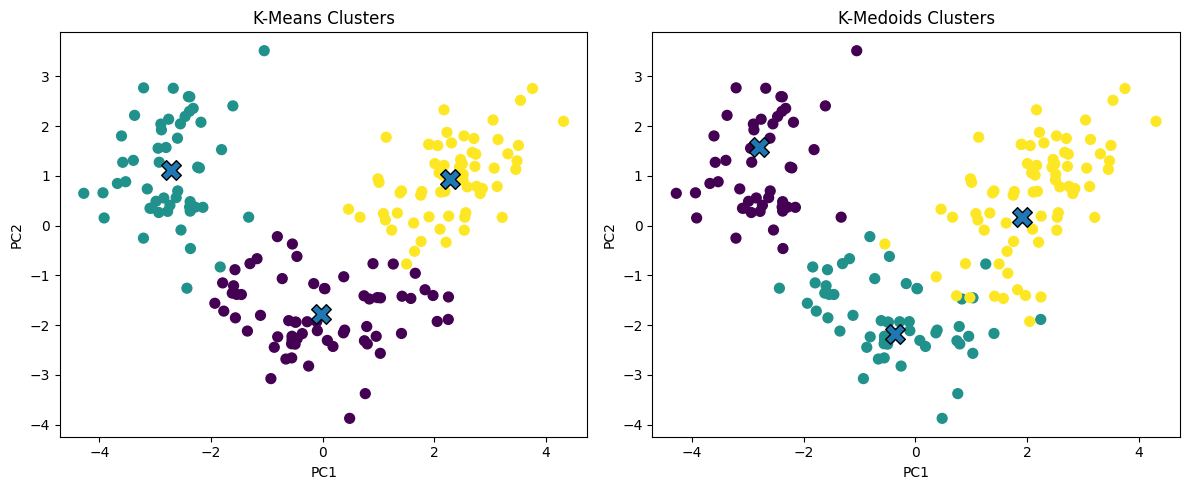

In [5]:
# Import PCA
from sklearn.decomposition import PCA

# Convert x_scaled to NumPy array before fitting PCA
x_scaled_array = x_scaled.values if hasattr(x_scaled, 'values') else x_scaled
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(x_scaled_array)

# Prepare figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means plot
axes[0].scatter(proj[:, 0], proj[:, 1], c=labels_km, s=50)              # plot samples
centers_2d = pca.transform(kmeans.cluster_centers_)                    # project centroids
axes[0].scatter(centers_2d[:, 0], centers_2d[:, 1], marker='X', s=200, edgecolor='k')
axes[0].set_title('K-Means Clusters')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# K-Medoids plot
axes[1].scatter(proj[:, 0], proj[:, 1], c=labels_kmed, s=50)            # plot samples
medoid_pts = proj[kmedoids.medoid_indices_]                             # select medoid coordinates
axes[1].scatter(medoid_pts[:, 0], medoid_pts[:, 1], marker='X', s=200, edgecolor='k')
axes[1].set_title('K-Medoids Clusters')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

plt.tight_layout()
plt.show()

**Insights:**  

- Both algorithms separate the main groups, but K-Means centroids sit more centrally within each cluster.
- K-Medoids medoids sometimes lie near edge samples, reflecting real-sample centers that can shift cluster boundaries.
- When clusters are roughly spherical, K-Means offers tighter grouping; when interpretability of an actual example is key, K-Medoids may be preferable.